In [3]:
import cv2
import numpy as np
import tensorflow as tf
import os

# Define the labels for classification
class_labels = ["Organic", "Recyclable"]

# Define the image size for resizing
IMG_SIZE = (224, 224)

# Load the trained model from the directory
model_path = os.path.join("model", "waste_classifier_model.h5")
model = tf.keras.models.load_model(model_path)

# Load the object detection model
prototxt_path = os.path.join("model", "MobileNetSSD_deploy.prototxt")
model_weights_path = os.path.join("model", "MobileNetSSD_deploy.caffemodel")
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_weights_path)

# Define the paths to the train and test directories
dataset_dir = "C:\\Users\\hp\\Downloads\\dataset"
train_dir = os.path.join(dataset_dir, "TRAIN")
test_dir = os.path.join(dataset_dir, "TEST")

# Create data generators for train and test sets with data augmentation
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Accuracy:', test_accuracy)


Found 2513 images belonging to 2 classes.
79/79 [==============================] - 67s 824ms/step - loss: 0.6300 - accuracy: 0.8631
Test Accuracy: 0.8631117939949036


In [6]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Set the path to your dataset directory
dataset_dir = "C:\\Users\\hp\\Downloads\\dataset"

# Define the image size for resizing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define the number of classes
num_classes = 2

# Define the paths to the train and test directories
train_dir = os.path.join(dataset_dir, "TRAIN")
test_dir = os.path.join(dataset_dir, "TEST")

# Create data generators for train and test sets with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load the MobileNetV2 model without the top classification layer
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

# Add your own classification layer on top
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=70,
    validation_data=test_generator
)

# Generate epoch vs accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/70
706/706 [==============================] - 813s 1s/step - loss: 0.2144 - accuracy: 0.9159 - val_loss: 0.2409 - val_accuracy: 0.8993
Epoch 2/70
706/706 [==============================] - 814s 1s/step - loss: 0.1515 - accuracy: 0.9418 - val_loss: 0.4552 - val_accuracy: 0.7859
Epoch 3/70
706/706 [==============================] - 1969s 3s/step - loss: 0.1394 - accuracy: 0.9467 - val_loss: 0.3122 - val_accuracy: 0.8647
Epoch 4/70
706/706 [==============================] - 1085s 2s/step - loss: 0.1241 - accuracy: 0.9519 - val_loss: 0.3698 - val_accuracy: 0.8265
Epoch 5/70
706/706 [==============================] - 2313s 3s/step - loss: 0.1156 - accuracy: 0.9540 - val_loss: 0.3650 - val_accuracy: 0.8496
Epoch 6/70
706/706 [==============================] - 5941s 8s/step - loss: 0.1074 - accuracy: 0.9588 - val_loss: 0.2924 - val_accuracy: 0.8910
Epoch 7/70
706/706 [==============================] -

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/10
 32/706 [>.............................] - ETA: 15:32 - loss: 0.5818 - accuracy: 0.7725

KeyboardInterrupt: 

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/10
706/706 [==============================] - 835s 1s/step - loss: 0.2129 - accuracy: 0.9161 - val_loss: 0.2945 - val_accuracy: 0.8695
Epoch 2/10
706/706 [==============================] - 832s 1s/step - loss: 0.1557 - accuracy: 0.9410 - val_loss: 0.3938 - val_accuracy: 0.8162
Epoch 3/10
706/706 [==============================] - 979s 1s/step - loss: 0.1374 - accuracy: 0.9482 - val_loss: 0.3157 - val_accuracy: 0.8579
Epoch 4/10
706/706 [==============================] - 892s 1s/step - loss: 0.1233 - accuracy: 0.9523 - val_loss: 0.4482 - val_accuracy: 0.8269
Epoch 5/10
706/706 [==============================] - 881s 1s/step - loss: 0.1156 - accuracy: 0.9551 - val_loss: 0.3549 - val_accuracy: 0.8508
Epoch 6/10
706/706 [==============================] - 886s 1s/step - loss: 0.1042 - accuracy: 0.9593 - val_loss: 0.4656 - val_accuracy: 0.8046
Epoch 7/10
706/706 [==============================] - 476

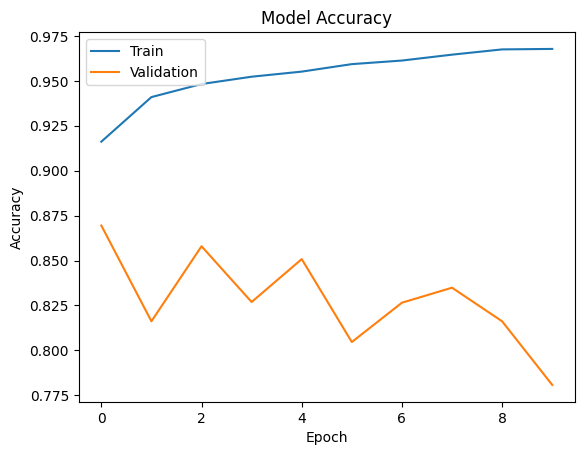

In [1]:
#CODE FOR 10 EPOC 

import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Set the path to your dataset directory
dataset_dir = "C:\\Users\\hp\\Downloads\\dataset"

# Define the image size for resizing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define the number of classes
num_classes = 2

# Define the paths to the train and test directories
train_dir = os.path.join(dataset_dir, "TRAIN")
test_dir = os.path.join(dataset_dir, "TEST")

# Create data generators for train and test sets with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load the MobileNetV2 model without the top classification layer
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

# Add your own classification layer on top
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Generate epoch vs accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/10
706/706 [==============================] - 1437s 2s/step - loss: 0.2704 - accuracy: 0.9012 - val_loss: 0.5657 - val_accuracy: 0.8973 - lr: 0.0010
Epoch 2/10
706/706 [==============================] - 18447s 26s/step - loss: 0.1972 - accuracy: 0.9288 - val_loss: 0.7024 - val_accuracy: 0.8727 - lr: 0.0010
Epoch 3/10
706/706 [==============================] - 1936s 3s/step - loss: 0.1820 - accuracy: 0.9348 - val_loss: 0.5622 - val_accuracy: 0.8774 - lr: 0.0010
Epoch 4/10
706/706 [==============================] - 1812s 3s/step - loss: 0.1588 - accuracy: 0.9414 - val_loss: 0.3302 - val_accuracy: 0.9073 - lr: 0.0010
Epoch 5/10
706/706 [==============================] - 1405s 2s/step - loss: 0.1508 - accuracy: 0.9444 - val_loss: 0.5395 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 6/10
706/706 [==============================] - 1289s 2s/step - loss: 0.1419 - accuracy: 0.9491 - val_loss: 0.5602 - val_accuracy: 0.9280 - lr: 0.0010
Epoch 7/10
706/706 [==============================] - ET

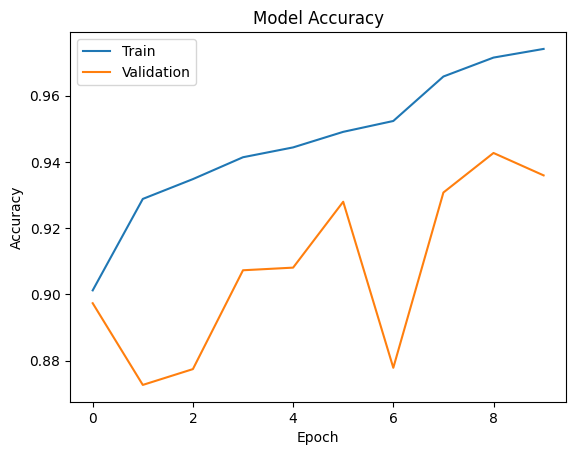

In [2]:
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3, verbose=1)

# Add dropout layers after the dense layers
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers for fine-tuning
unfreeze_from_layer = 100
for layer in base_model.layers[unfreeze_from_layer:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[lr_scheduler]
)

# Generate epoch vs accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/20
706/706 [==============================] - 1691s 2s/step - loss: 0.2225 - accuracy: 0.9224 - val_loss: 0.8483 - val_accuracy: 0.7465 - lr: 0.0010
Epoch 2/20
706/706 [==============================] - 58168s 83s/step - loss: 0.1994 - accuracy: 0.9270 - val_loss: 0.9578 - val_accuracy: 0.8074 - lr: 0.0010
Epoch 3/20
706/706 [==============================] - 1943s 3s/step - loss: 0.1784 - accuracy: 0.9348 - val_loss: 0.4374 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 4/20
706/706 [==============================] - 2255s 3s/step - loss: 0.1902 - accuracy: 0.9282 - val_loss: 0.8015 - val_accuracy: 0.8691 - lr: 0.0010
Epoch 5/20
706/706 [==============================] - 2615s 4s/step - loss: 0.1910 - accuracy: 0.9310 - val_loss: 0.7546 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 6/20
706/706 [==============================] - 1855s 3s/step - loss: 0.1747 - accuracy: 0.9356 - val_loss: 0.3220 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 7/20
706/706 [==============================] - 22

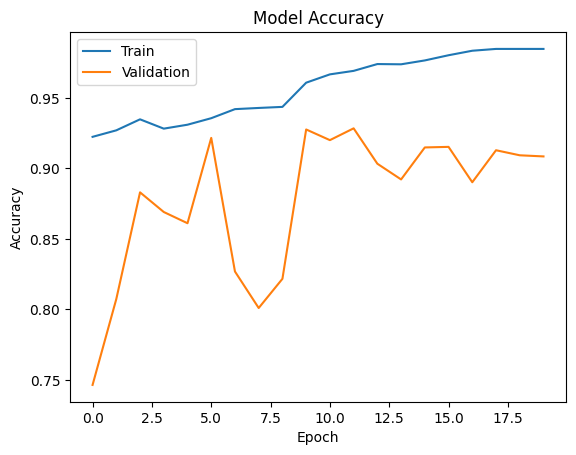

In [3]:
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3, verbose=1)

# Add dropout layers after the dense layers
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers for fine-tuning
unfreeze_from_layer = 50
for layer in base_model.layers[unfreeze_from_layer:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[lr_scheduler]
)

# Generate epoch vs accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [2]:
import cv2
import numpy as np
import tensorflow as tf
import os

# Define the labels for classification
class_labels = ["Organic", "Recyclable"]

# Define the image size for resizing
IMG_SIZE = (224, 224)

# Load the trained model from the directory
model_path = os.path.join("model", "waste_classifier_model.h5")
model = tf.keras.models.load_model(model_path)

# Load the object detection model
prototxt_path = os.path.join("model", "MobileNetSSD_deploy.prototxt")
model_weights_path = os.path.join("model", "MobileNetSSD_deploy.caffemodel")
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_weights_path)

# Open the camera
cap = cv2.VideoCapture(0)

# Create a named window
cv2.namedWindow("Camera")

# Set the window size
cv2.resizeWindow("Camera", 1200, 1200)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Perform object detection
    blob = cv2.dnn.blobFromImage(frame, 0.007843, IMG_SIZE, (127.5, 127.5, 127.5), swapRB=True, crop=False)
    net.setInput(blob)
    detections = net.forward()

    # Process each detected object
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections
        if confidence > 0.5:
            # Get the coordinates of the detected object
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (startX, startY, endX, endY) = box.astype(int)

            # Extract the object from the frame
            object_img = frame[startY:endY, startX:endX]

            # Check if the object image is valid
            if object_img.shape[0] <= 0 or object_img.shape[1] <= 0:
                continue

            # Preprocess the object image
            object_resized = cv2.resize(object_img, IMG_SIZE)
            object_normalized = object_resized / 255.0
            object_expanded = np.expand_dims(object_normalized, axis=0)

            # Make prediction
            predictions = model.predict(object_expanded)
            predicted_class = np.argmax(predictions)
            prediction_percentage = np.max(predictions) * 100

            # Get the predicted class label and percentage
            class_label = class_labels[predicted_class]
            prediction_text = f"{class_label}: {prediction_percentage:.2f}%"

            # Draw a rectangle around the detected object
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

            # Display the predicted class label and percentage
            cv2.putText(frame, prediction_text, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow("Camera", frame)

    # Capture and save the image when 'c' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('c'):
        cv2.imwrite("captured_image.jpg", frame)
        print("Image captured and saved as 'captured_image.jpg'")
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 73ms/step


In [7]:
import tkinter as tk
from PIL import ImageTk, Image
import cv2
import numpy as np
import tensorflow as tf
import os

# Define the labels for classification
class_labels = ["Organic", "Recyclable"]

# Define the image size for resizing
IMG_SIZE = (224, 224)

# Load the trained model from the directory
model_path = os.path.join("model", "waste_classifier_model.h5")
model = tf.keras.models.load_model(model_path)

# Load the object detection model
prototxt_path = os.path.join("model", "MobileNetSSD_deploy.prototxt")
model_weights_path = os.path.join("model", "MobileNetSSD_deploy.caffemodel")
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_weights_path)

# Create a Tkinter window
window = tk.Tk()
window.title("Waste Wise")

# Create a canvas to display the image and camera feed
canvas = tk.Canvas(window, width=1000, height=600)
canvas.pack()

# Load and resize the image
image_path = "image.png"  # Specify the path to your image
image = Image.open(image_path)
image = image.resize((400, 400), Image.ANTIALIAS)
image = ImageTk.PhotoImage(image)

# Create a label to display the image
image_label = tk.Label(canvas, image=image)
image_label.pack(side=tk.LEFT, padx=10, pady=10)

# Create a frame to hold the camera feed
camera_frame = tk.Frame(canvas, width=600, height=600)
camera_frame.pack(side=tk.RIGHT)

# Open the camera
cap = cv2.VideoCapture(0)

# Create a label for the camera feed
camera_label = tk.Label(camera_frame)
camera_label.pack()

def update_frame():
    # Read a frame from the camera
    ret, frame = cap.read()

    if ret:
        # Perform object detection
        blob = cv2.dnn.blobFromImage(frame, 0.007843, IMG_SIZE, (127.5, 127.5, 127.5), swapRB=True, crop=False)
        net.setInput(blob)
        detections = net.forward()

        # Process each detected object
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]

            # Filter out weak detections
            if confidence > 0.5:
                # Get the coordinates of the detected object
                box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
                (startX, startY, endX, endY) = box.astype(int)

                # Extract the object from the frame
                object_img = frame[startY:endY, startX:endX]

                # Check if the object image is valid
                if object_img.shape[0] <= 0 or object_img.shape[1] <= 0:
                    continue

                # Preprocess the object image
                object_resized = cv2.resize(object_img, IMG_SIZE)
                object_normalized = object_resized / 255.0
                object_expanded = np.expand_dims(object_normalized, axis=0)

                # Make prediction
                predictions = model.predict(object_expanded)
                predicted_class = np.argmax(predictions)
                prediction_percentage = np.max(predictions) * 100

                # Get the predicted class label and percentage
                class_label = class_labels[predicted_class]
                prediction_text = f"{class_label}: {prediction_percentage:.2f}%"

                # Draw a rectangle around the detected object
                cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

                # Display the predicted class label and percentage
                cv2.putText(frame, prediction_text, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Convert the frame to PIL Image format
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(image)
        image = ImageTk.PhotoImage(image)

        # Update the camera label with the new image
        camera_label.configure(image=image)
        camera_label.image = image  # Keep a reference to prevent garbage collection

    # Schedule the next frame update
    window.after(1, update_frame)

# Start updating the frame
update_frame()

# Run the Tkinter event loop
window.mainloop()

# Release the camera
cap.release()


FileNotFoundError: [Errno 2] No such file or directory: 'your_image.jpg'